In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import gc, time

%matplotlib inline

pd.set_option('display.max_rows', 100)
pd.set_option('display.max_columns', 200)

In [63]:
train_data = pd.read_csv('train.csv')
test_data = pd.read_csv('test.csv')

In [11]:
print('####mean####\n', train_data[['Pclass', 'Age', 'SibSp', 'Parch', 'Fare']].mean())
print('####max####\n', train_data[['Pclass', 'Age', 'SibSp', 'Parch', 'Fare']].max())
print('####min####\n', train_data[['Pclass', 'Age', 'SibSp', 'Parch', 'Fare']].min())
print('####std####\n', train_data[['Pclass', 'Age', 'SibSp', 'Parch', 'Fare']].std())

####mean####
 Pclass     2.308642
Age       29.699118
SibSp      0.523008
Parch      0.381594
Fare      32.204208
dtype: float64
####max####
 Pclass      3.0000
Age        80.0000
SibSp       8.0000
Parch       6.0000
Fare      512.3292
dtype: float64
####min####
 Pclass    1.00
Age       0.42
SibSp     0.00
Parch     0.00
Fare      0.00
dtype: float64
####std####
 Pclass     0.836071
Age       14.526497
SibSp      1.102743
Parch      0.806057
Fare      49.693429
dtype: float64


In [64]:
train_test_data = pd.concat([train_data, test_data])

In [16]:
train_data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [17]:
test_data.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [24]:
train_test_data['Age'].fillna(int(train_test_data['Age'].mean()), inplace=True)

In [65]:
cabin_col = train_test_data['Cabin'].tolist()

In [39]:
type(cabin_col[1])

str

In [66]:
for i in range(len(cabin_col)):
    if type(cabin_col[i]) == str:
        cabin_col[i] = cabin_col[i][0]

In [67]:
train_test_data['Cabin'] = cabin_col

In [68]:
train_test_data['Cabin'].value_counts()

C    94
B    65
D    46
E    41
A    22
F    21
G     5
T     1
Name: Cabin, dtype: int64

In [69]:
object_columns = train_test_data.dtypes[train_test_data.dtypes == 'object'].index.tolist()

for column in object_columns:
    train_test_data[column] = pd.factorize(train_test_data[column])[0]

In [70]:
train_data = train_test_data[~train_test_data['Survived'].isnull()]
test_data = train_test_data[train_test_data['Survived'].isnull()]
train_data.shape, test_data.shape

((891, 12), (418, 12))

In [71]:
train_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0.0,3,0,0,22.0,1,0,0,7.2500,-1,0
1,2,1.0,1,1,1,38.0,1,0,1,71.2833,0,1
2,3,1.0,3,2,1,26.0,0,0,2,7.9250,-1,0
3,4,1.0,1,3,1,35.0,1,0,3,53.1000,0,0
4,5,0.0,3,4,0,35.0,0,0,4,8.0500,-1,0


In [72]:
from sklearn.model_selection import train_test_split

ftr_train = train_data.drop(['PassengerId', 'Survived', 'Name', 'Ticket'], axis=1)
survived_train = train_data['Survived']
train_x, valid_x, train_y, valid_y = train_test_split(ftr_train, survived_train, test_size=0.3, random_state=2022)
train_x.shape, valid_x.shape

((623, 8), (268, 8))

In [73]:
from lightgbm import LGBMClassifier

clf = LGBMClassifier(
    n_jobs=-1,
    n_estimators=500,
    learning_rate=0.02,
    num_leaves=12,
    subsample=0.8,
    max_depth=8,
    silent=-1,
    verbose=-1
)

clf.fit(train_x, train_y, eval_set=[(train_x, train_y), (valid_x, valid_y)], eval_metric='auc', verbose=30,
       early_stopping_rounds=30)

/Users/dongin-jang/opt/anaconda3/lib/python3.9/site-packages/lightgbm/sklearn.py:598: UserWarning: 'silent' argument is deprecated and will be removed in a future release of LightGBM. Pass 'verbose' parameter via keyword arguments instead.
  _log_warning("'silent' argument is deprecated and will be removed in a future release of LightGBM. "
/Users/dongin-jang/opt/anaconda3/lib/python3.9/site-packages/lightgbm/sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
/Users/dongin-jang/opt/anaconda3/lib/python3.9/site-packages/lightgbm/sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verb

[30]	training's auc: 0.901596	training's binary_logloss: 0.489072	valid_1's auc: 0.845952	valid_1's binary_logloss: 0.515098
[60]	training's auc: 0.912421	training's binary_logloss: 0.414095	valid_1's auc: 0.854911	valid_1's binary_logloss: 0.459103
[90]	training's auc: 0.916645	training's binary_logloss: 0.375109	valid_1's auc: 0.863214	valid_1's binary_logloss: 0.434539
[120]	training's auc: 0.923619	training's binary_logloss: 0.34772	valid_1's auc: 0.867321	valid_1's binary_logloss: 0.421194
[150]	training's auc: 0.932192	training's binary_logloss: 0.327347	valid_1's auc: 0.868304	valid_1's binary_logloss: 0.418763


LGBMClassifier(learning_rate=0.02, max_depth=8, n_estimators=500, num_leaves=12,
               silent=-1, subsample=0.8, verbose=-1)

<AxesSubplot:title={'center':'Feature importance'}, xlabel='Feature importance', ylabel='Features'>

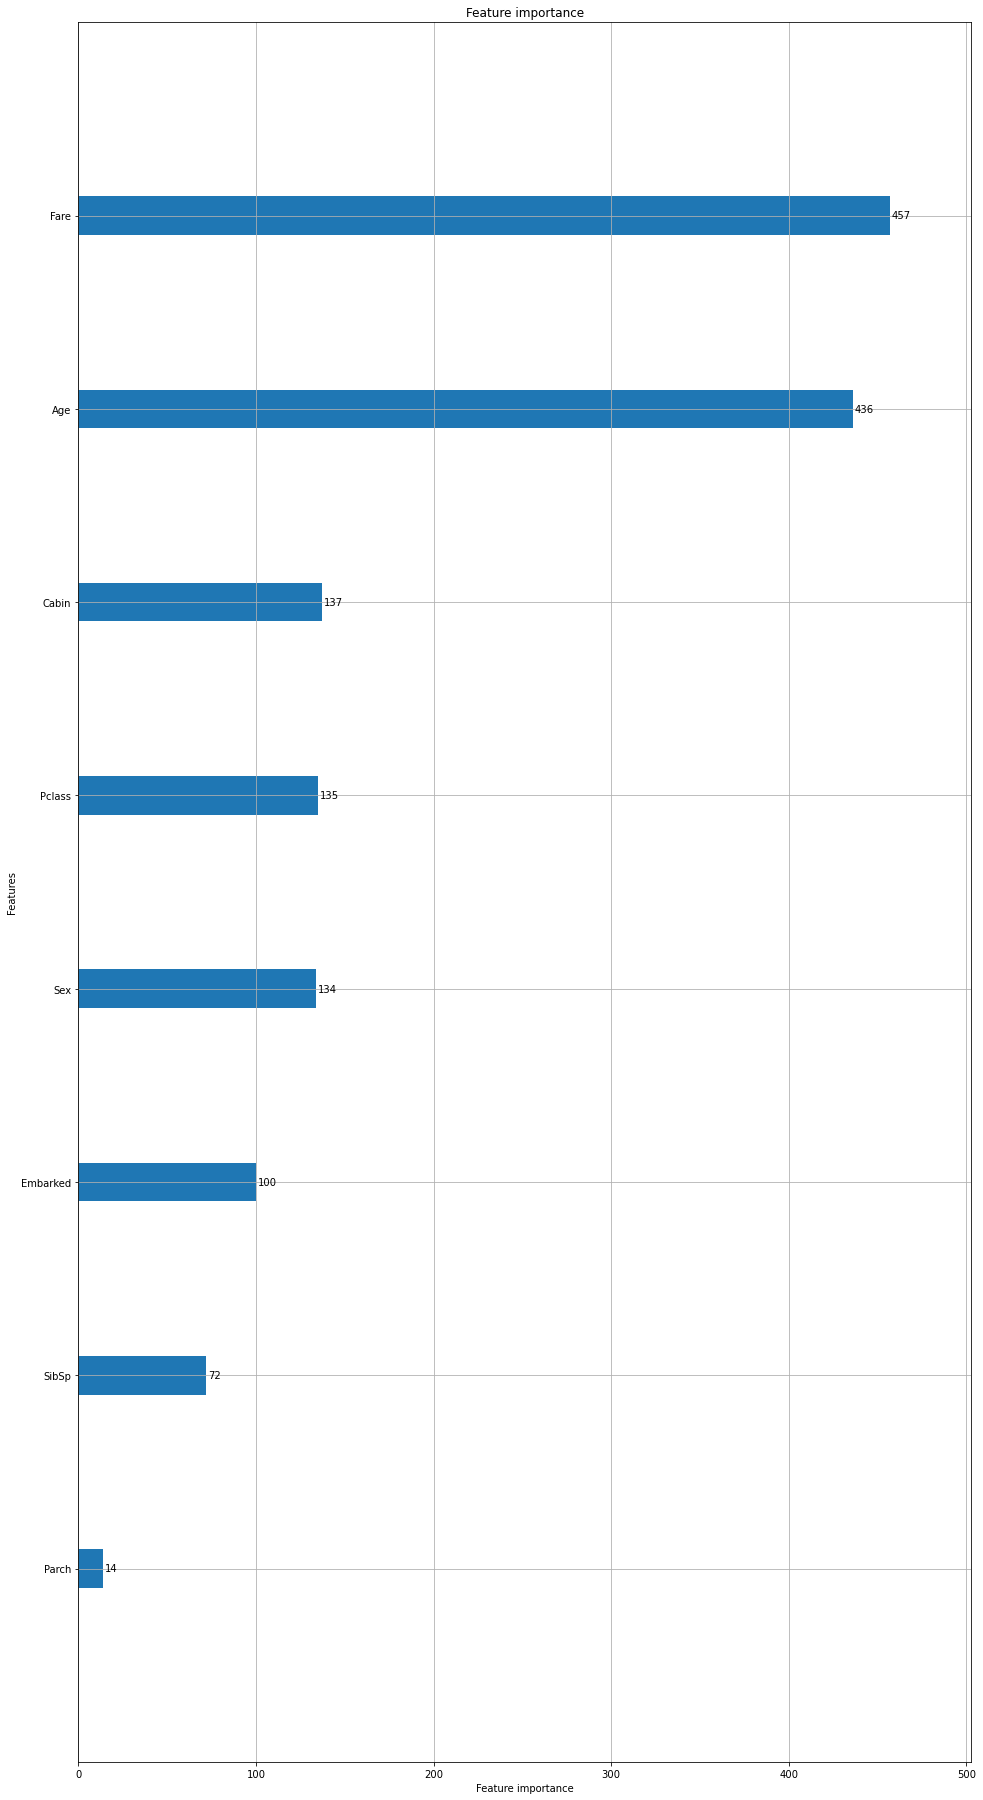

In [62]:
from lightgbm import plot_importance
plot_importance(clf, figsize=(16, 32))

In [75]:
test_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,NaN,3,696,0,34.5,0,0,681,7.8292,-1,2
1,893,NaN,3,891,1,47.0,1,0,682,7.0000,-1,0
2,894,NaN,2,892,0,62.0,0,0,683,9.6875,-1,2
3,895,NaN,3,893,0,27.0,0,0,684,8.6625,-1,0
4,896,NaN,3,894,1,22.0,1,1,405,12.2875,-1,0


In [83]:
preds = clf.predict_proba(test_data.drop(['PassengerId', 'Survived', 'Name', 'Ticket'], axis=1))[:, 1].tolist()

In [86]:
for i in range(len(preds)):
    if preds[i] > 0.5:
        preds[i] = 1
    else:
        preds[i] = 0

In [87]:
test_data['Survived'] = preds

/var/folders/09/xdnxbw6n7bl58mxczkp01qq40000gn/T/ipykernel_6297/1324259112.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_data['Survived'] = preds


In [89]:
test_data.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,0,3,696,0,34.5,0,0,681,7.8292,-1,2
1,893,0,3,891,1,47.0,1,0,682,7.0000,-1,0
2,894,0,2,892,0,62.0,0,0,683,9.6875,-1,2
3,895,0,3,893,0,27.0,0,0,684,8.6625,-1,0
4,896,0,3,894,1,22.0,1,1,405,12.2875,-1,0
5,897,0,3,895,0,14.0,0,0,685,9.2250,-1,0
6,898,1,3,289,1,30.0,0,0,686,7.6292,-1,2
7,899,0,2,896,0,26.0,1,1,76,29.0000,-1,0
8,900,1,3,897,1,18.0,0,0,687,7.2292,-1,1
9,901,0,3,898,0,21.0,2,0,467,24.1500,-1,0


In [90]:
test_data[['PassengerId', 'Survived']].to_csv('titanic_feature_engineering.csv', index=False)